# Machine Learning to forecast Bitcoin price movements
# Part 1: Obtaining, exploring and preparing the data

## Obtaining and labelling stock market data

As described in our project proposal, we will first use historical data from financial data as our data inputs. For this, we are going to use `yfinance` library, that scrapes this data from Yahoo Finance, returning it as a pandas dataframe, which will facilitate most of this work.

However, since the tickers mostly have special signs and we want to create an object for each ticker historical data, I'll first get the data and clear the name to get an appropiate object.

In [1]:
# importing commonly used libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
tickers = ['SPY','DAX','^IXIC', 'GC=F', 'SI=F','CL=F', '^TNX',
           'BTCUSD=X','^N225','^ftse', 'EURUSD=X','000001.SS', '^HSI']
signs = ['=','^','-','.']
ma_values = [4,96,200]
rsi_values = {
    'k': None,
    'd': None,
    'alpha':None
}

def change_name(ticker):
    if ticker == 'tnx':
        x = 'rates'
    elif ticker == 'sif':
        x = 'silver'
    elif ticker == 'gcf':
        x = 'gold'
    elif ticker == 'ixic':
        x = 'nasdaq'
    elif ticker == 'clf':
        x = 'crude oil'
    elif ticker == 'btcusdx':
        x = 'btc'
    elif ticker == 'n225':
        x = 'nikkei'
    elif ticker == 'eurusdx':
        x = 'euro'
    elif ticker == '000001ss':
        x = 'shangai'
    else:
        x = ticker
    return x

def lower_clean_name(word, signs):
    word = word.lower()
    for char in signs: 
        word = word.replace(char, '')
    return word

# test change labels amongst indices

labels = [lower_clean_name(word,signs) for word in tickers]
changed_labels = [change_name(x) for x in labels]

for x in range(len(labels)):
    print(labels[x] +' = '+changed_labels[x])


spy = spy
dax = dax
ixic = nasdaq
gcf = gold
sif = silver
clf = crude oil
tnx = rates
btcusdx = btc
n225 = nikkei
ftse = ftse
eurusdx = euro
000001ss = shangai
hsi = hsi


In [3]:
ticker_concat = " ".join(tickers)
data_ohlc = yf.download(ticker_concat, start="2008-01-01")
data_ticker = yf.download(ticker_concat, start="2008-01-01", group_by='tickers')

[*********************100%***********************]  13 of 13 completed
[*********************100%***********************]  13 of 13 completed


In [4]:
data_ohlc.tail()

Adj Close                                                \
              000001.SS      BTCUSD=X       CL=F        DAX  EURUSD=X   
Date                                                                    
2020-11-04  3277.439941  14133.715820  39.150002  27.038000  1.176221   
2020-11-05  3320.133057  15579.842773  38.790001  27.799999  1.173268   
2020-11-06  3312.158936  15565.875000  37.139999  27.809999  1.181754   
2020-11-09  3373.733887  15332.320312  40.290001  28.850000  1.189301   
2020-11-10  3360.148438  15334.010742  41.860001  29.200001  1.182732   

                                                                           \
                   GC=F       SI=F         SPY        ^FTSE          ^HSI   
Date                                                                        
2020-11-04  1894.599976  23.864000  343.540009  5883.299805  24886.140625   
2020-11-05  1945.300049  25.171000  350.239990  5906.200195  25695.919922   
2020-11-06  1950.300049  25.646000  350.160004  5910.000000  25712.970703   
2020-11-09  1853.199951  23.684999  354.559998  6186.299805  26016.169922   
2020-11-10  1877.400024  24.309999  354.040009  6296.850098  26301.480469   

                                                     Close                \
                   ^IXIC         ^N225   ^TNX    000001.SS      BTCUSD=X   
Date                                                                       
2020-11-04  11590.780273  23695.230469  0.768  3277.439941  14133.715820   
2020-11-05  11890.929688  24105.279297  0.776  3320.133057  15579.842773   
2020-11-06  11895.230469  24325.230469  0.820  3312.158936  15565.875000   
2020-11-09  11713.780273  24839.839844  0.958  3373.733887  15332.320312   
2020-11-10  11553.855469  24905.589844  0.972  3360.148438  15334.010742   

                                                                    \
                 CL=F        DAX  EURUSD=X         GC=F       SI=F   
Date                                                                 
2020-11-04  39.150002  27.038000  1.176221  1894.599976  23.864000   
2020-11-05  38.790001  27.799999  1.173268  1945.300049  25.171000   
2020-11-06  37.139999  27.809999  1.181754  1950.300049  25.646000   
2020-11-09  40.290001  28.850000  1.189301  1853.199951  23.684999   
2020-11-10  41.860001  29.200001  1.182732  1877.400024  24.309999   

                                                                               \
                   SPY        ^FTSE          ^HSI         ^IXIC         ^N225   
Date                                                                            
2020-11-04  343.540009  5883.299805  24886.140625  11590.780273  23695.230469   
2020-11-05  350.239990  5906.200195  25695.919922  11890.929688  24105.279297   
2020-11-06  350.160004  5910.000000  25712.970703  11895.230469  24325.230469   
2020-11-09  354.559998  6186.299805  26016.169922  11713.780273  24839.839844   
2020-11-10  354.040009  6296.850098  26301.480469  11553.855469  24905.589844   

                          High                                                \
             ^TNX    000001.SS      BTCUSD=X       CL=F        DAX  EURUSD=X   
Date                                                                           
2020-11-04  0.768  3286.621094  13580.480469  39.250000  27.230000  1.176886   
2020-11-05  0.776  3320.407959  14102.085938  39.349998  27.885000  1.185677   
2020-11-06  0.820  3326.465088  15226.841797  38.610001  27.900000  1.189061   
2020-11-09  0.958  3380.823975  14865.534180  41.330002  29.459999  1.191923   
2020-11-10  0.972  3387.621826  15334.010742  42.270000  29.250000  1.184357   

                                                                           \
                   GC=F       SI=F         SPY        ^FTSE          ^HSI   
Date                                                                        
2020-11-04  1907.000000  24.004999  347.940002  5885.700195  25093.720703   
2020-11-05  1948.000000  25.171000  352.1900

In [5]:
# Renaming columns to changed labels

close = data_ohlc['Close'].fillna(method='ffill')
close.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)

In [6]:
close.columns

Index(['shangai', 'btc', 'crude oil', 'dax', 'euro', 'gold', 'silver', 'spy',
       'ftse', 'hsi', 'nasdaq', 'nikkei', 'rates'],
      dtype='object')

## Returns and cumulative returns

<AxesSubplot:xlabel='Date', ylabel='Cumulative Returns'>

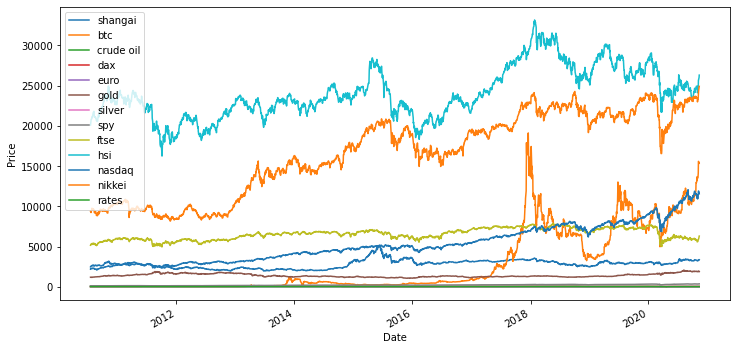

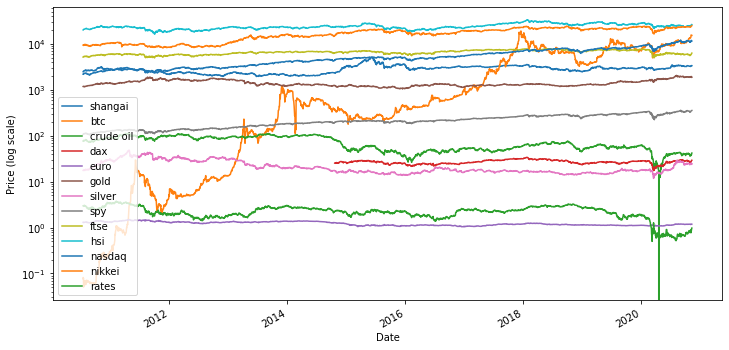

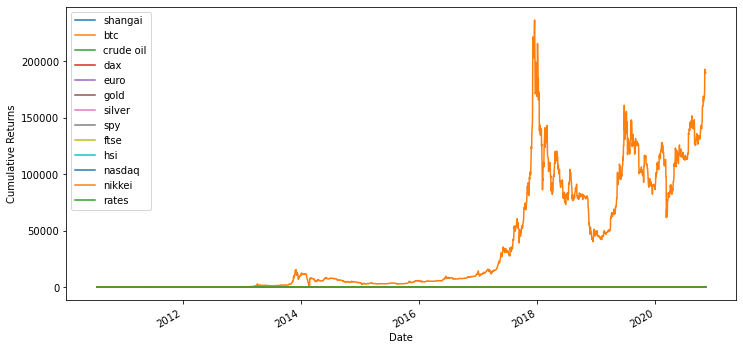

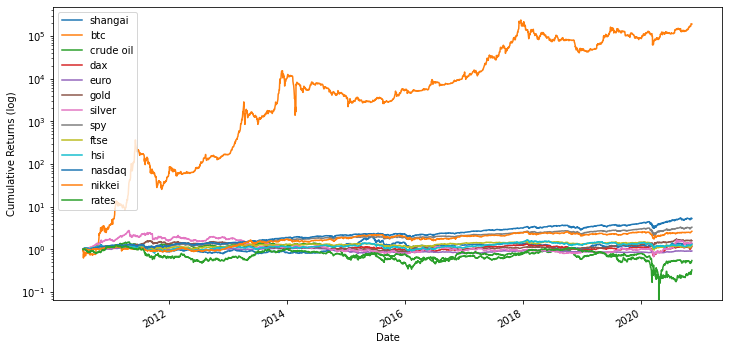

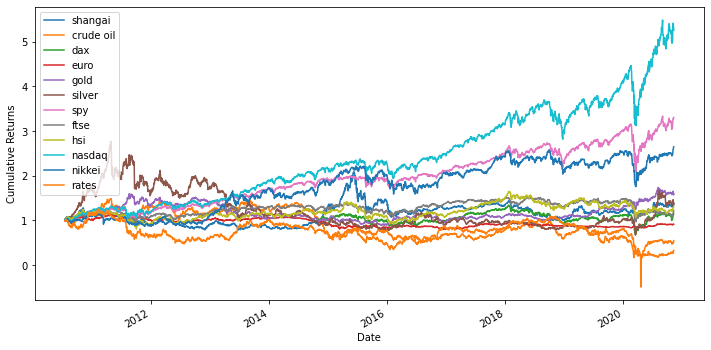

In [7]:
close = close[close.btc.notnull()]
returns = close.pct_change(1)
cumulative = (1+ returns).cumprod()
close.plot(figsize=(12,6),ylabel='Price')
close.plot(figsize=(12,6),ylabel='Price (log scale)', logy=True)
cumulative.plot(figsize=(12,6),ylabel='Cumulative Returns')
cumulative.plot(figsize=(12,6),ylabel='Cumulative Returns (log)', logy=True)
cumulative.loc[:,cumulative.columns != 'btc'].plot(
    figsize=(12,6), ylabel='Cumulative Returns')

## Performing technical analysis calculations

In [8]:
def transform_ma(data, ma1=4, ma2=96, ma3=200):
    data['MA'+str(ma1)] = round(data['Close'].rolling(ma1).mean(),0)
    data['MA'+str(ma2)] = round(data['Close'].rolling(ma2).mean(),0)
    data['MA'+str(ma3)] = round(data['Close'].rolling(ma3).mean(),0)    
    return data

In [9]:
def transform_rsi(data, alpha=14, smoothK=3, smoothD=3):
    
    data['change'] = data['Close'].pct_change(1)
    data['cum_change'] = (data['change']+1).cumprod()
    data['k'] = 0
    data['d'] = 0

    cond_k = data.change > 0
    cond_d = data.change < 0

    data['k'] = data.k.mask(cond_k, data['change'])
    data['d'] = data.d.mask(cond_d, - data['change'])
    # data['num'] = data['k'].rolling(alpha).mean()
    
    data['num'] = pd.Series.ewm(data['k'], span=alpha).mean()
    data['div'] = pd.Series.ewm(data['d'], span=alpha).mean()
    
    # data['div'] = data['d'].rolling(alpha).mean()
    data['rs'] = data['num']/data['div']
    data['RSI'] = (100 - (100/(1+data['rs'])))
    data['RSImin'] = data['RSI'].rolling(alpha).min()
    data['RSImax'] = data['RSI'].rolling(alpha).max()
    data['stochRSI'] = 100*(data['RSI'] - data['RSImin']) / (data['RSImax'] - data['RSImin'])
    data['smoothK'] = round(data['stochRSI'].rolling(smoothK).mean(),2)
    data['smoothD'] = round(data['smoothK'].rolling(smoothD).mean(),2)
    data['K1'] = data['smoothK'].shift(1)
    data['D1'] = data['smoothD'].shift(1)

    # cond_num_zero = data.num == 0
    # data['RSI'] = data.RSI.mask(cond_num_zero, 0)

    # cond_div_zero = data.div == 0
    # data['RSI'] = data.RSI.mask(cond_div_zero, 100)

    return data

def transform_std(df, confidence=0.80):
    df['btc_std_dev'] = df['cum_change'].expanding(2).std()
    df['btc_mean'] = df['cum_change'].expanding(2).mean()
    df['std_dif'] = (df['cum_change'] - df['btc_std_dev']).abs()
    df['conf_int'] = confidence * df.std_dif / np.sqrt(np.arange(len(df))+1)

    return df

In [10]:
btc = data_ticker['BTCUSD=X']
btc = btc[btc.Close.notnull()]
btc = transform_std(transform_rsi(transform_ma(btc, ma_values[0], ma_values[1], ma_values[2])))
btc.head()

,Open,High,Low,Close,Adj Close,Volume,MA4,MA96,MA200,change,cum_change,k,d,num,div,rs,RSI,RSImin,RSImax,stochRSI,smoothK,smoothD,K1,D1,btc_std_dev,btc_mean,std_dif,conf_int
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-07-19,0.08584,0.07723,0.09307,0.08080,0.08080,4900.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.08080,0.07426,0.08181,0.07474,0.07474,2000.0,NaN,NaN,NaN,-0.075000,0.925000,0.000000,0.075000,0.000000,0.040179,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.07474,0.06634,0.07921,0.07921,0.07921,4200.0,NaN,NaN,NaN,0.059807,0.980322,0.059807,0.000000,0.022847,0.024830,0.920113,47.919729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039118,0.952661,0.941203,0.434723
2010-07-22,0.07921,0.05050,0.08181,0.05050,0.05050,12900.0,0.0,NaN,NaN,-0.362454,0.625000,0.000000,0.362454,0.015857,0.128119,0.123769,11.013756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191187,0.843441,0.433813,0.173525
2010-07-23,0.05050,0.05050,0.06767,0.06262,0.06262,14100.0,0.0,NaN,NaN,0.240000,0.775000,0.240000,0.000000,0.074336,0.094693,0.785019,43.978182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.159810,0.826330,0.615190,0.220097


In [11]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume,MA4,MA96,MA200,change,cum_change,k,d,num,div,rs,RSI,RSImin,RSImax,stochRSI,smoothK,smoothD,K1,D1,btc_std_dev,btc_mean,std_dif,conf_int
count,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2.692000e+03,2689.000000,2597.000000,2493.000000,2691.000000,2691.000000,2692.000000,2692.000000,2692.000000,2692.000000,2691.000000,2691.000000,2678.000000,2678.000000,2678.000000,2676.000000,2674.000000,2675.000000,2673.000000,2690.000000,2690.000000,2690.000000,2690.000000
mean,2790.395104,2712.515461,2862.898792,2795.400919,2795.400919,7.525792e+09,2789.949795,2680.712745,2592.320096,0.007282,34609.403391,0.022869,0.015590,0.022907,0.015709,2.621744,57.423801,39.993197,73.003594,53.122432,53.108161,53.085898,53.103024,53.075458,12544.001010,7317.035590,22100.949716,381.640795
std,3939.169411,3817.204679,4046.288224,3946.458959,3946.458959,2.754247e+10,3931.789246,3651.689133,3428.547564,0.091424,48846.837628,0.079374,0.036629,0.027336,0.014646,4.475076,19.267792,17.846143,15.668287,35.574133,32.314024,30.993801,32.318973,30.994898,16973.872195,10073.667592,34611.065761,586.708371
min,0.050500,0.010000,0.056000,0.050500,0.050500,0.000000e+00,0.000000,0.000000,0.000000,-0.572057,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.463924,0.000000,0.000000,0.000000,0.000000,0.000000,0.039118,0.773400,0.067112,0.002684
25%,26.915001,25.650000,28.950000,27.190001,27.190001,0.000000e+00,27.000000,73.000000,79.000000,-0.014702,347.401000,0.000000,0.000000,0.009256,0.006374,0.792898,44.224369,27.136594,60.478591,20.141092,22.785000,23.532500,22.770000,23.510000,75.832114,78.732925,109.539894,3.488079
50%,462.279984,453.487000,480.480026,464.053009,464.053009,4.743995e+07,463.000000,527.000000,490.000000,0.002089,5748.639095,0.002086,0.000000,0.015762,0.011521,1.289976,56.331425,39.676630,72.987065,55.302121,55.690000,55.605000,55.650000,55.600000,3047.831883,2193.793422,2820.927362,68.673953
75%,5655.882080,5477.089966,5811.746948,5663.151611,5663.151611,2.363075e+09,5714.000000,5497.000000,5802.000000,0.023856,70275.670135,0.023851,0.014699,0.027082,0.020308,2.531224,71.681134,52.552521,86.463253,87.031823,82.565000,81.847500,82.590000,81.850000,32882.378250,13510.118794,41691.545041,717.975824
max,19118.302734,18355.898438,19370.986328,19114.208984,19114.208984,2.089610e+11,17806.000000,11464.000000,9791.000000,3.368390,236562.001595,3.368390,0.572057,0.510597,0.156999,64.826429,98.480853,92.111166,98.480853,100.000000,100.000000,100.000000,100.000000,100.000000,48846.837628,34609.403391,215606.543132,3920.118966


<AxesSubplot:xlabel='Date'>

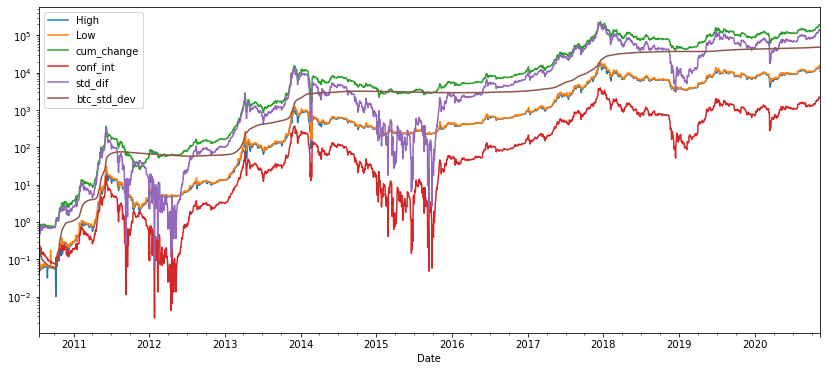

In [12]:
btc[['High','Low','cum_change','conf_int','std_dif','btc_std_dev']].plot(figsize=(14,6),logy=True)

In [13]:
# Initial selection of features to the model

btc = btc[[f'MA{ma_values[0]}',f'MA{ma_values[1]}', f'MA{ma_values[2]}', 'stochRSI', 'RSI','btc_std_dev','std_dif', 'conf_int']].fillna(method='bfill')

In [14]:
data = pd.concat([cumulative, btc], axis=1)
data.drop(data.index[0], inplace=True)
# data

In [15]:
import quandl
quandl.ApiConfig.api_key = 'JyQYtbs6JcZtygFBCPzC'

In [16]:
# btcmining = quandl.get('BITCOINWATCH/MINING') # total btc and marketcap, bad quality data
# btcmining.fillna(method='ffill').plot(legend=None, logy=True)

btc_hrate = quandl.get('BCHAIN/HRATE') # hashrate
btc_diff = quandl.get('BCHAIN/DIFF') # difficulty
btc_ntrat = quandl.get('BCHAIN/NTRAT') # number of transactions
btc_cptra = quandl.get('BCHAIN/CPTRA') # cost per transaction

<AxesSubplot:xlabel='Date'>

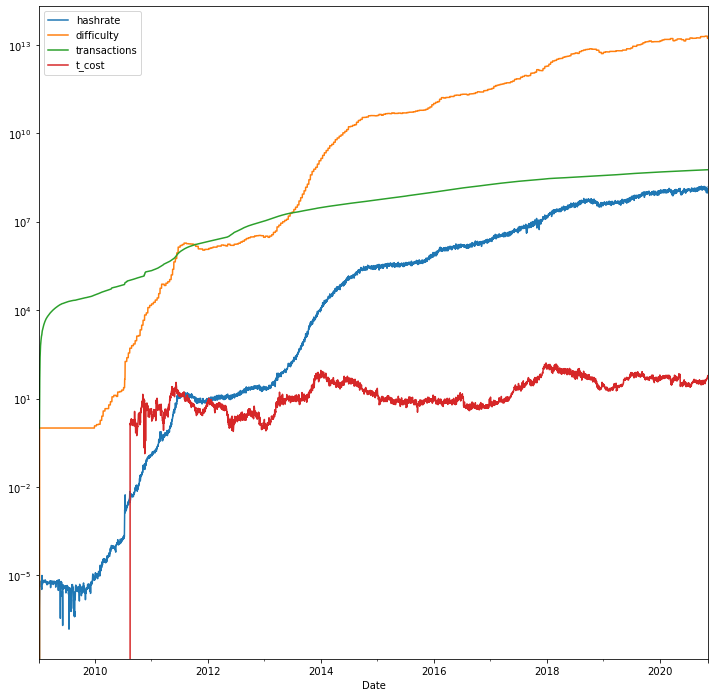

In [17]:
fundamentals = pd.concat([btc_hrate, btc_diff, btc_ntrat, btc_cptra], axis=1)
fundamentals.fillna(method='bfill')
fundamentals.columns = ['hashrate','difficulty','transactions','t_cost']
fundamentals.plot(figsize=(12,12), logy=True)

In [18]:
df = pd.concat([data,fundamentals], axis=1)
df = df[df.btc.notnull()]

## Correlation between features selected and Bitcoin

In [19]:
def min_max_scaler(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df, df.min(), df.max()

def back_min_max(ndf,mindf,maxdf):
    df = ndf*(maxdf-mindf) + mindf
    return df

In [20]:
ndf, mindf, maxdf = min_max_scaler(df)

In [21]:
# Correlation of BTC with features

df.corr()['btc']

shangai         0.314669
btc             1.000000
crude oil      -0.465737
dax             0.401107
euro           -0.424542
gold            0.244830
silver         -0.362336
spy             0.845346
ftse            0.468836
hsi             0.689896
nasdaq          0.873096
nikkei          0.736608
rates          -0.298523
MA4             0.998196
MA96            0.933848
MA200           0.884238
stochRSI       -0.042521
RSI            -0.046507
btc_std_dev     0.889822
std_dif         0.974635
conf_int        0.961151
hashrate        0.814048
difficulty      0.809841
transactions    0.886781
t_cost          0.811654
Name: btc, dtype: float64

In [22]:
# Normalized correlation does not change, uncomment below to see

# ndf.corr()['btc']

<AxesSubplot:>

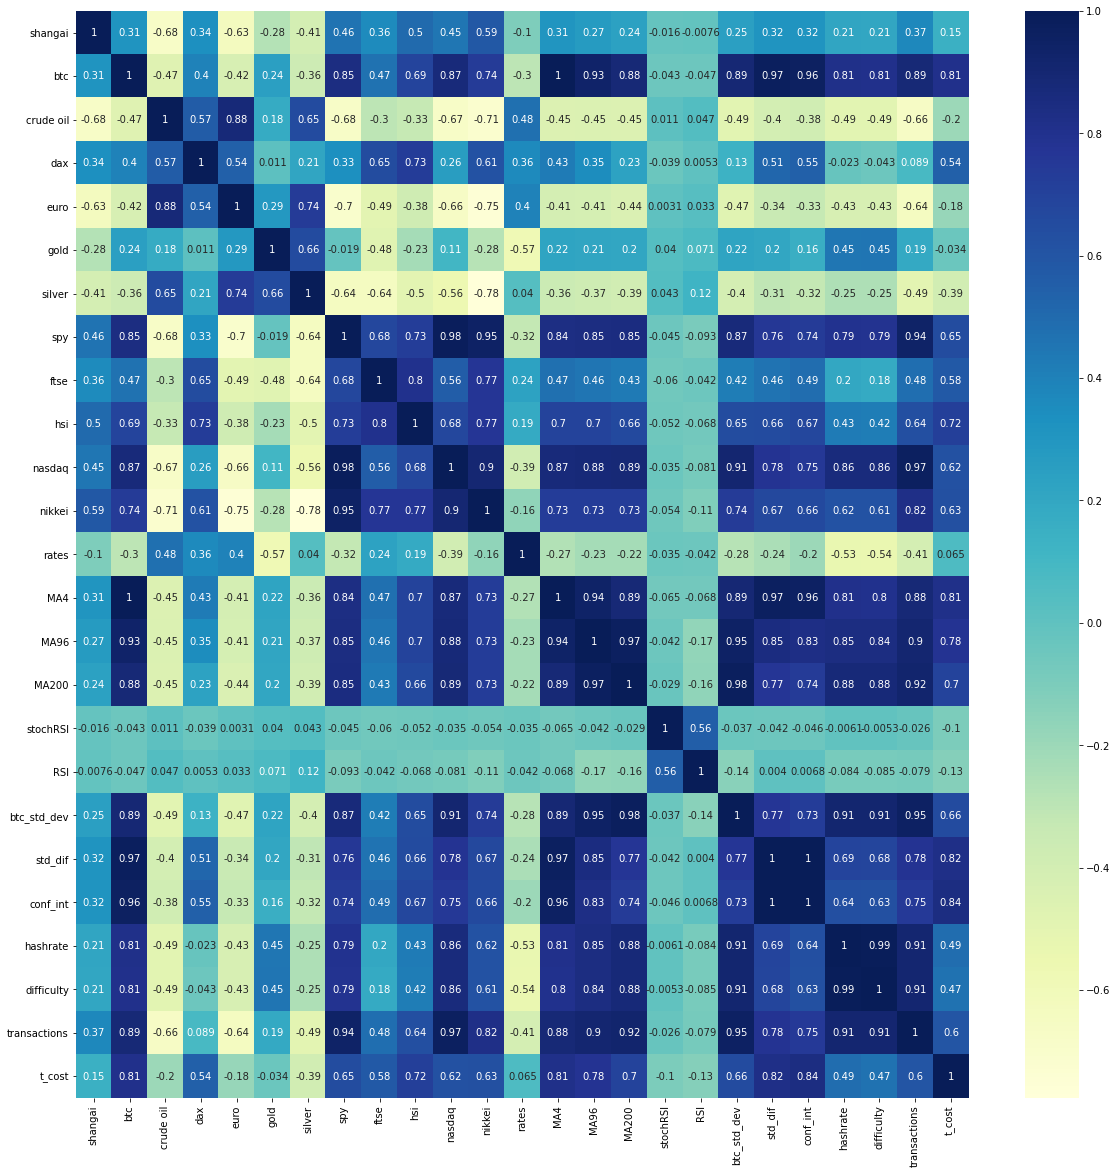

In [23]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(ndf.corr(), 
        xticklabels=ndf.corr().columns,
        yticklabels=ndf.corr().columns, ax=ax, annot=True, cmap="YlGnBu")

In [24]:
# Description of normalized features
print(ndf.shape)
ndf.describe()

(2778, 25)


,shangai,btc,crude oil,dax,euro,gold,silver,spy,ftse,hsi,nasdaq,nikkei,rates,MA4,MA96,MA200,stochRSI,RSI,btc_std_dev,std_dif,conf_int,hashrate,difficulty,transactions,t_cost
count,2778.000000,2778.000000,2778.000000,1665.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2.778000e+03,2.778000e+03,2778.000000,2778.000000
mean,0.270252,0.154850,0.701774,0.568666,0.394548,0.344136,0.253115,0.427729,0.551747,0.465237,0.330419,0.513696,0.525123,0.156569,0.225669,0.245285,0.532964,0.583096,0.256707,0.102468,0.097318,1.412163e-01,1.546927e-01,0.303778,0.154293
std,0.160729,0.209940,0.156021,0.157132,0.250220,0.208389,0.189366,0.254075,0.232827,0.184326,0.231475,0.298301,0.197249,0.220772,0.315853,0.344058,0.355758,0.195650,0.347463,0.160511,0.149650,2.400142e-01,2.641203e-01,0.315799,0.158696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.128674,0.002796,0.573618,0.461651,0.178477,0.192765,0.121774,0.197647,0.346391,0.339979,0.111674,0.249415,0.408943,0.001460,0.001221,0.001123,0.202171,0.449066,0.001551,0.000504,0.000889,2.731303e-07,2.424056e-07,0.024813,0.038594
50%,0.289271,0.028008,0.655549,0.560341,0.312910,0.267663,0.165405,0.407019,0.572176,0.431315,0.284322,0.555090,0.537043,0.026002,0.042830,0.045246,0.555324,0.572004,0.062386,0.013058,0.017446,3.126407e-03,3.292851e-03,0.157937,0.075552
75%,0.370071,0.333326,0.861095,0.674688,0.624300,0.504672,0.344026,0.654494,0.763450,0.596733,0.521030,0.777970,0.662430,0.320847,0.446485,0.548718,0.875468,0.727869,0.672941,0.193318,0.183024,2.312814e-01,2.553552e-01,0.560025,0.240591
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000


## Storing the data for future use

In [25]:
df.to_csv('data.csv')
ndf.to_csv('normalised_data.csv')